In [2]:
from langchain.agents import create_tool_calling_agent
from langchain_openai import ChatOpenAI
from langchain import hub
from langchain_core.tools import tool
from serpapi import GoogleSearch
import os

serpapi_params = {
    "engine": "google",
    "api_key": os.environ["SERPAPI_KEY"]
}

In [3]:
@tool
def web_search(query: str) -> str:
    """Finds general knowledge information using Google search. Can also be used
    to augment more 'general' knowledge to a previous specialist query."""
    search = GoogleSearch({**serpapi_params, "q":query, "n": 3})
    results = search.get_dict()["organic_results"]
    contexts = "\n---\n".join(
         ["\n".join([x["title"], x["snippet"], x["link"]]) for x in results]
        )
    
    return contexts

web_search.invoke("Cool buildings in Paris")

"25 Must-See Paris Landmarks\nLocated on the Île de la Cité, a thin island in the Seine, Notre Dame de Paris is perhaps the most famous cathedral in the world. Characterized ...\nhttps://www.architecturaldigest.com/gallery/paris-architectural-landmarks\n---\nTHE 10 BEST Paris Architectural Buildings (Updated 2024)\nArchitectural Buildings in Paris · 1. Louvre Museum · 2. Cathédrale Notre-Dame de Paris · 3. Arc de Triomphe · 4. Palais Garnier · 5. Sainte- ...\nhttps://www.tripadvisor.com/Attractions-g187147-Activities-c47-t3-Paris_Ile_de_France.html\n---\nParis City Guide: 23 Places Every Architect Must Visit\n1. Centre Georges Pompidou ... Save this picture! ... Description: This is one of the most iconic buildings in Paris and houses the Musée National d ...\nhttps://www.archdaily.com/922278/23-places-in-paris-every-architect-must-visit\n---\n22 of the Most Famous Buildings in Paris You Must See\nMost Famous Buildings in Paris You Must See · 1. The Louvre Museum · 2. Notre-Dame Cathed

In [4]:
llm = ChatOpenAI(model="gpt-4o", temperature=0)

llm.invoke("What is the capital of France?")

AIMessage(content='The capital of France is Paris.', response_metadata={'token_usage': {'completion_tokens': 7, 'prompt_tokens': 14, 'total_tokens': 21}, 'model_name': 'gpt-4o-2024-05-13', 'system_fingerprint': 'fp_c4e5b6fa31', 'finish_reason': 'stop', 'logprobs': None}, id='run-f748a7dd-63b6-4607-9bb5-65018a290578-0', usage_metadata={'input_tokens': 14, 'output_tokens': 7, 'total_tokens': 21})

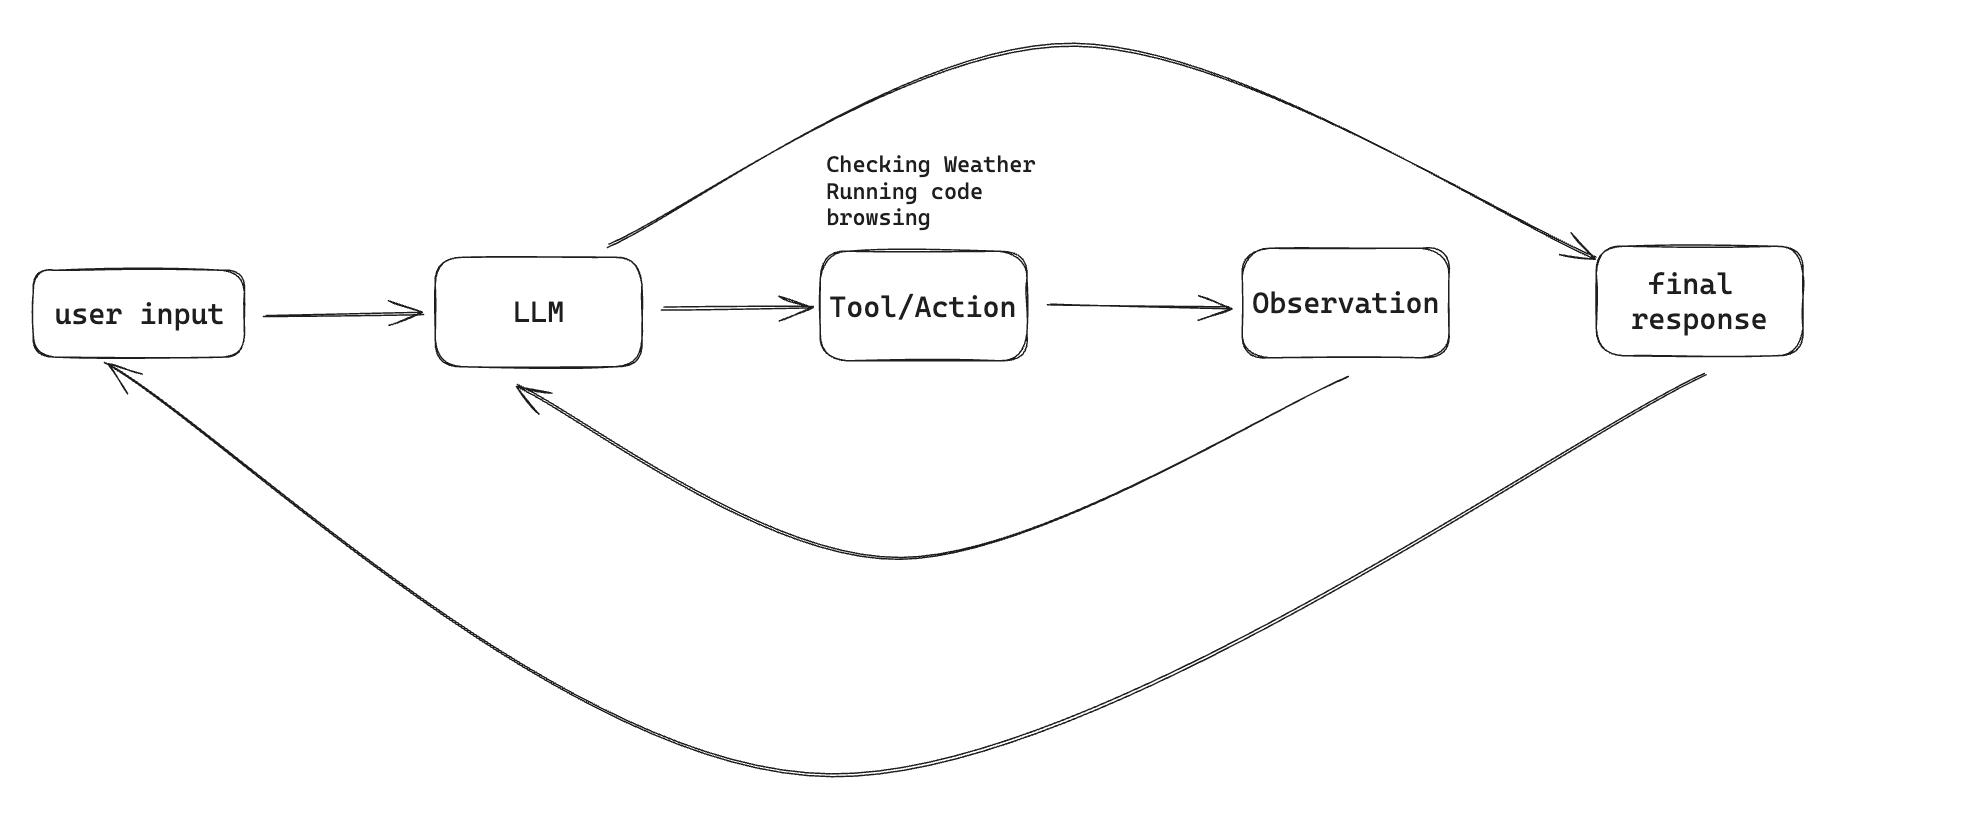

In [5]:
tools = [web_search]

In [6]:
prompt = hub.pull("hwchase17/openai-tools-agent")

prompt

ChatPromptTemplate(input_variables=['agent_scratchpad', 'input'], optional_variables=['chat_history'], input_types={'chat_history': typing.List[typing.Union[langchain_core.messages.ai.AIMessage, langchain_core.messages.human.HumanMessage, langchain_core.messages.chat.ChatMessage, langchain_core.messages.system.SystemMessage, langchain_core.messages.function.FunctionMessage, langchain_core.messages.tool.ToolMessage]], 'agent_scratchpad': typing.List[typing.Union[langchain_core.messages.ai.AIMessage, langchain_core.messages.human.HumanMessage, langchain_core.messages.chat.ChatMessage, langchain_core.messages.system.SystemMessage, langchain_core.messages.function.FunctionMessage, langchain_core.messages.tool.ToolMessage]]}, partial_variables={'chat_history': []}, metadata={'lc_hub_owner': 'hwchase17', 'lc_hub_repo': 'openai-tools-agent', 'lc_hub_commit_hash': 'c18672812789a3b9697656dd539edf0120285dcae36396d0b548ae42a4ed66f5'}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(in

In [7]:
agent = create_tool_calling_agent(llm, tools, prompt)

In [8]:
agent

RunnableAssign(mapper={
  agent_scratchpad: RunnableLambda(lambda x: message_formatter(x['intermediate_steps']))
})
| ChatPromptTemplate(input_variables=['agent_scratchpad', 'input'], optional_variables=['chat_history'], input_types={'chat_history': typing.List[typing.Union[langchain_core.messages.ai.AIMessage, langchain_core.messages.human.HumanMessage, langchain_core.messages.chat.ChatMessage, langchain_core.messages.system.SystemMessage, langchain_core.messages.function.FunctionMessage, langchain_core.messages.tool.ToolMessage]], 'agent_scratchpad': typing.List[typing.Union[langchain_core.messages.ai.AIMessage, langchain_core.messages.human.HumanMessage, langchain_core.messages.chat.ChatMessage, langchain_core.messages.system.SystemMessage, langchain_core.messages.function.FunctionMessage, langchain_core.messages.tool.ToolMessage]]}, partial_variables={'chat_history': []}, metadata={'lc_hub_owner': 'hwchase17', 'lc_hub_repo': 'openai-tools-agent', 'lc_hub_commit_hash': 'c18672812789

In [10]:
from langchain.agents import AgentExecutor

agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

agent_executor.invoke({'input': 'What are cool buildings in Alicante Spain?'})



> Entering new AgentExecutor chain...

Invoking: `web_search` with `{'query': 'cool buildings in Alicante Spain'}`


Architectural Buildings in Alicante - Tripadvisor
Architectural Buildings in Alicante ; 1. Casa Carbonell ; 2. Diputacion Provincial de Alicante ; 3. Archives Municipales ; 4. Sarrio Tower ; 5. Oficina De Correos.
https://www.tripadvisor.com/Attractions-g1064230-Activities-c47-t3-Alicante_Costa_Blanca_Province_of_Alicante_Valencian_Community.html
---
Monuments and historical buildings - Alicante Turismo
Castle of Santa Bárbara · The Town Hall · The Carbonell House · The Central Market · Teatro Principal · Bullring (Plaza de Toros) · Other notable civil buildings.
https://alicanteturismo.com/en/monuments-historical-buildings/
---
Architecture and design in Alicante
The best architecture and design projects in Alicante, Spain, curated by Dezeen.
https://www.dezeen.com/tag/alicante/
---
11 Cool and Unusual Things to Do in Alicante
Central Market Building ... This magnific

{'input': 'What are cool buildings in Alicante Spain?',
 'output': "Alicante, Spain, is home to several cool and notable buildings. Here are some of the highlights:\n\n1. **Castle of Santa Bárbara**: A historic castle offering panoramic views of the city and the Mediterranean Sea.\n2. **Casa Carbonell**: A remarkable architectural gem and historic building that stands as a testament to Alicante's rich heritage.\n3. **The Town Hall (Ayuntamiento de Alicante)**: An impressive baroque building located in the heart of the city.\n4. **The Central Market (Mercado Central)**: A magnificent market building that also serves as a poignant symbol of the suffering caused by the Spanish Civil War.\n5. **Teatro Principal**: The main theater in Alicante, known for its neoclassical architecture.\n6. **Bullring (Plaza de Toros)**: A historic bullring that is still in use today.\n7. **Diputacion Provincial de Alicante**: Another notable architectural building in the city.\n8. **Archives Municipales**: T